# Customer Churn Prediction in Retail Banking

# Loading Data and Exploration

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Loading the dataset

In [246]:
data = pd.read_csv('bank-additional.csv',header=0)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


# Finding the shape of the dataset

In [247]:
print(data.shape)

(4119, 21)


Here we can understand that we have 21 columns and 4119 rows in the dataset

In [248]:
print(data.describe())

               age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000  
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695  
std        1.563114        0.579349       4.594578     1.733591    73.667904  
min       -3.4000

Getting the Count: The number of non-null values in each column.

Mean: The average value of each column.

Standard Deviation (std): It indicates how much individual data points deviate from the mean.

Minimum (min): The smallest value in each column.

25th Percentile (25%): Also known as the first quartile, it's the value below which 25% of the data falls.

Median (50%): Also known as the second quartile or the median, it's the middle value when the data is sorted. 
    It represents the central tendency.

75th Percentile (75%): Also known as the third quartile, it's the value below which 75% of the data falls.

Maximum (max): The largest value in each column

In [249]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

We can understand that the data consists 3 data types which are object, int64 and float64

# Finding if their are Null Values

In [250]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no null values present in this dataset,
So we will find if the data has unique values

# Finding the unique value in the data table

In [251]:
for i in data.columns:
    print({i:data[i].unique()})

{'age': array([30, 39, 25, 38, 47, 32, 41, 31, 35, 36, 29, 27, 44, 46, 45, 50, 55,
       40, 28, 34, 33, 51, 48, 20, 76, 56, 24, 58, 60, 37, 52, 42, 49, 54,
       59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64,
       74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70],
      dtype=int64)}
{'job': array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)}
{'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object)}
{'education': array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)}
{'default': array(['no', 'unknown', 'yes'], dtype=object)}
{'housing': array(['yes', 'no', 'unknown'], dtype=object)}
{'loan': array(['no', 'unknown', 'yes'], dtype=object)}
{'contact': array(['cellular', 'telephone'], dty

Here we can see that column- {job,marital,education,default,housing,loan} have unknown values so replacing them with mode since 
the data type is 'object'

# Replacing 'unknown' with mode values for each column because the data type is object

In [252]:
for column in data.columns:
    mode_value = data[column].mode()[0]
    data[column].replace('unknown', mode_value, inplace=True)

# Checking if the unknown values are replaced in the data table

In [253]:
for i in data.columns:
    print({i:data[i].unique()})

{'age': array([30, 39, 25, 38, 47, 32, 41, 31, 35, 36, 29, 27, 44, 46, 45, 50, 55,
       40, 28, 34, 33, 51, 48, 20, 76, 56, 24, 58, 60, 37, 52, 42, 49, 54,
       59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64,
       74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70],
      dtype=int64)}
{'job': array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed'], dtype=object)}
{'marital': array(['married', 'single', 'divorced'], dtype=object)}
{'education': array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'illiterate'],
      dtype=object)}
{'default': array(['no', 'yes'], dtype=object)}
{'housing': array(['yes', 'no'], dtype=object)}
{'loan': array(['no', 'yes'], dtype=object)}
{'contact': array(['cellular', 'telephone'], dtype=object)}
{'month': array(['may', 'jun', 'nov', 'sep', 'jul', 'au

All the unknown values are replaced so we will proceed with deleting the less relevant columns

# Correlation Heatmap (To find which columns should be dropped)

C:\Users\Shraddha\AppData\Local\Temp\ipykernel_19612\2086025028.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


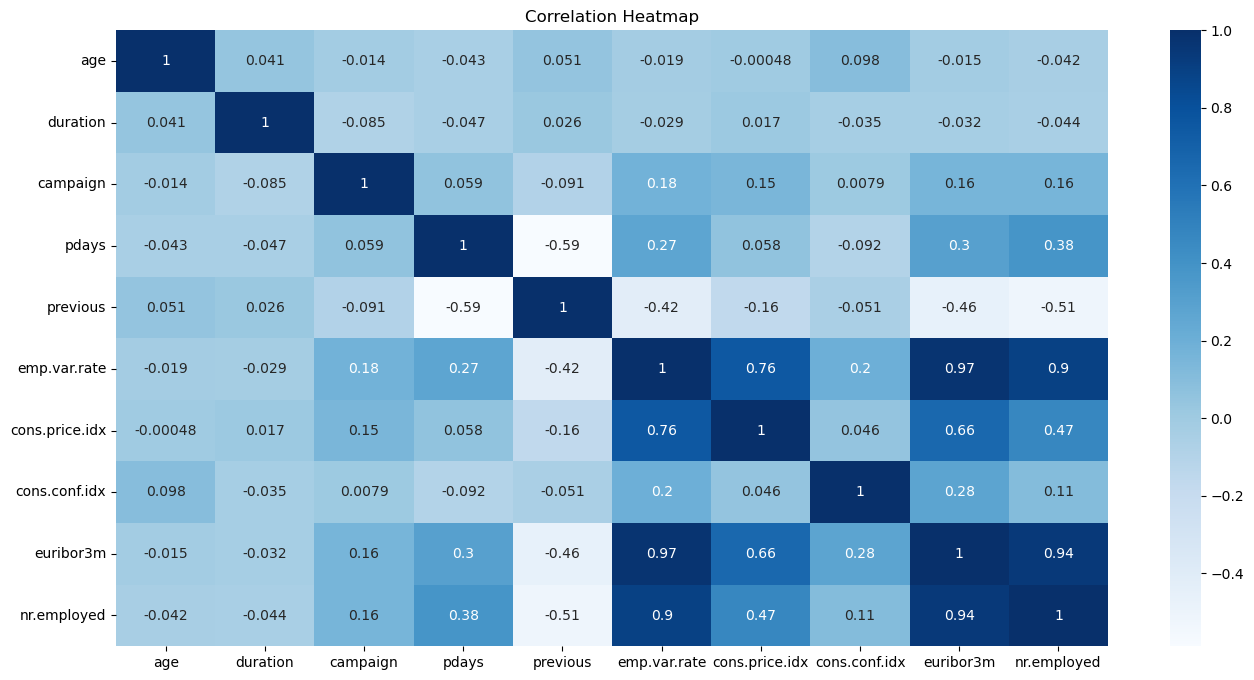

In [254]:
plt.figure(figsize=(16, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

# Dropping the least important columns that are not affecting the prediction based on the correlation heatmap

In [255]:
data.drop('emp.var.rate',axis=1,inplace=True)
data.drop('cons.price.idx',axis=1,inplace=True)
data.drop('euribor3m',axis=1,inplace=True)

# Checking the shape and info after dropping the columns

In [256]:
data.shape

(4119, 18)

We have reduced the columns from 21 to 18 and rows are the same(4119)

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            4119 non-null   int64  
 1   job            4119 non-null   object 
 2   marital        4119 non-null   object 
 3   education      4119 non-null   object 
 4   default        4119 non-null   object 
 5   housing        4119 non-null   object 
 6   loan           4119 non-null   object 
 7   contact        4119 non-null   object 
 8   month          4119 non-null   object 
 9   day_of_week    4119 non-null   object 
 10  duration       4119 non-null   int64  
 11  campaign       4119 non-null   int64  
 12  pdays          4119 non-null   int64  
 13  previous       4119 non-null   int64  
 14  poutcome       4119 non-null   object 
 15  cons.conf.idx  4119 non-null   float64
 16  nr.employed    4119 non-null   float64
 17  y              4119 non-null   object 
dtypes: float

Used data.info() to find the columns with 'object' data type so we can replace them 

# Finding the columns with the 'object' data type and appending in the list name 'colname'

In [258]:
colname=[]
for x in data.columns:
    if data[x].dtype=='object':
        colname.append(x)
colname

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

# Data Preprocessing

# Converting Categorical Variables Into Numerical Variables

 Using the list 'colname' for label encoding

In [259]:
#for preprocessing the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature job
mapping {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10}
Feature marital
mapping {'divorced': 0, 'married': 1, 'single': 2}
Feature education
mapping {'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6}
Feature default
mapping {'no': 0, 'yes': 1}
Feature housing
mapping {'no': 0, 'yes': 1}
Feature loan
mapping {'no': 0, 'yes': 1}
Feature contact
mapping {'cellular': 0, 'telephone': 1}
Feature month
mapping {'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}
Feature day_of_week
mapping {'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4}
Feature poutcome
mapping {'failure': 0, 'nonexistent': 1, 'success': 2}
Feature y
mapping {'no': 0, 'yes': 1}


Here in the Y column 
0 is no and 1 is yes, 
As label encoding is performed in an alphabetical order.

In [260]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,nr.employed,y
0,30,1,1,2,0,1,0,0,6,0,487,2,999,0,1,-46.2,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,346,4,999,0,1,-36.4,5191.0,0
2,25,7,1,3,0,1,0,1,4,4,227,1,999,0,1,-41.8,5228.1,0
3,38,7,1,2,0,1,0,1,4,0,17,3,999,0,1,-41.8,5228.1,0
4,47,0,1,6,0,1,0,0,7,1,58,1,999,0,1,-42.0,5195.8,0


Checking the data is neatly converted to numerical values

# Data Visualization

# Age Distribution

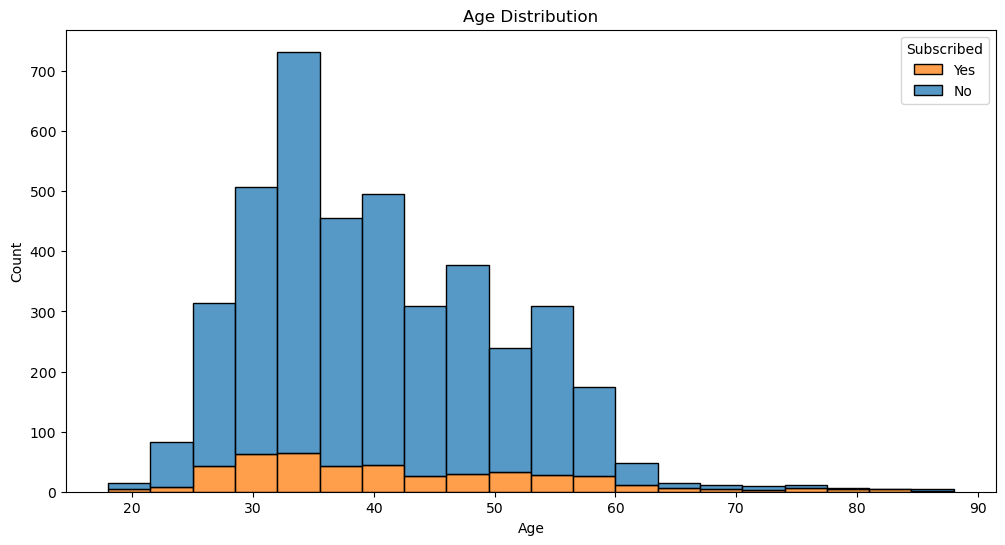

In [261]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='age', bins=20, hue='y', multiple='stack')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Subscribed', loc='upper right', labels=['Yes', 'No'])
plt.show()

# Marital Status vs. Subscription

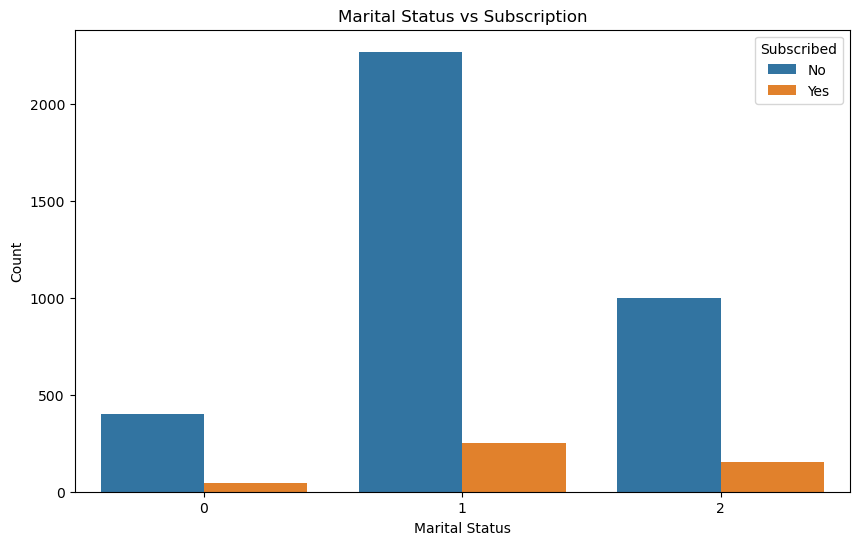

In [262]:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='y', data=data)
plt.title('Marital Status vs Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscribed', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Pairplot

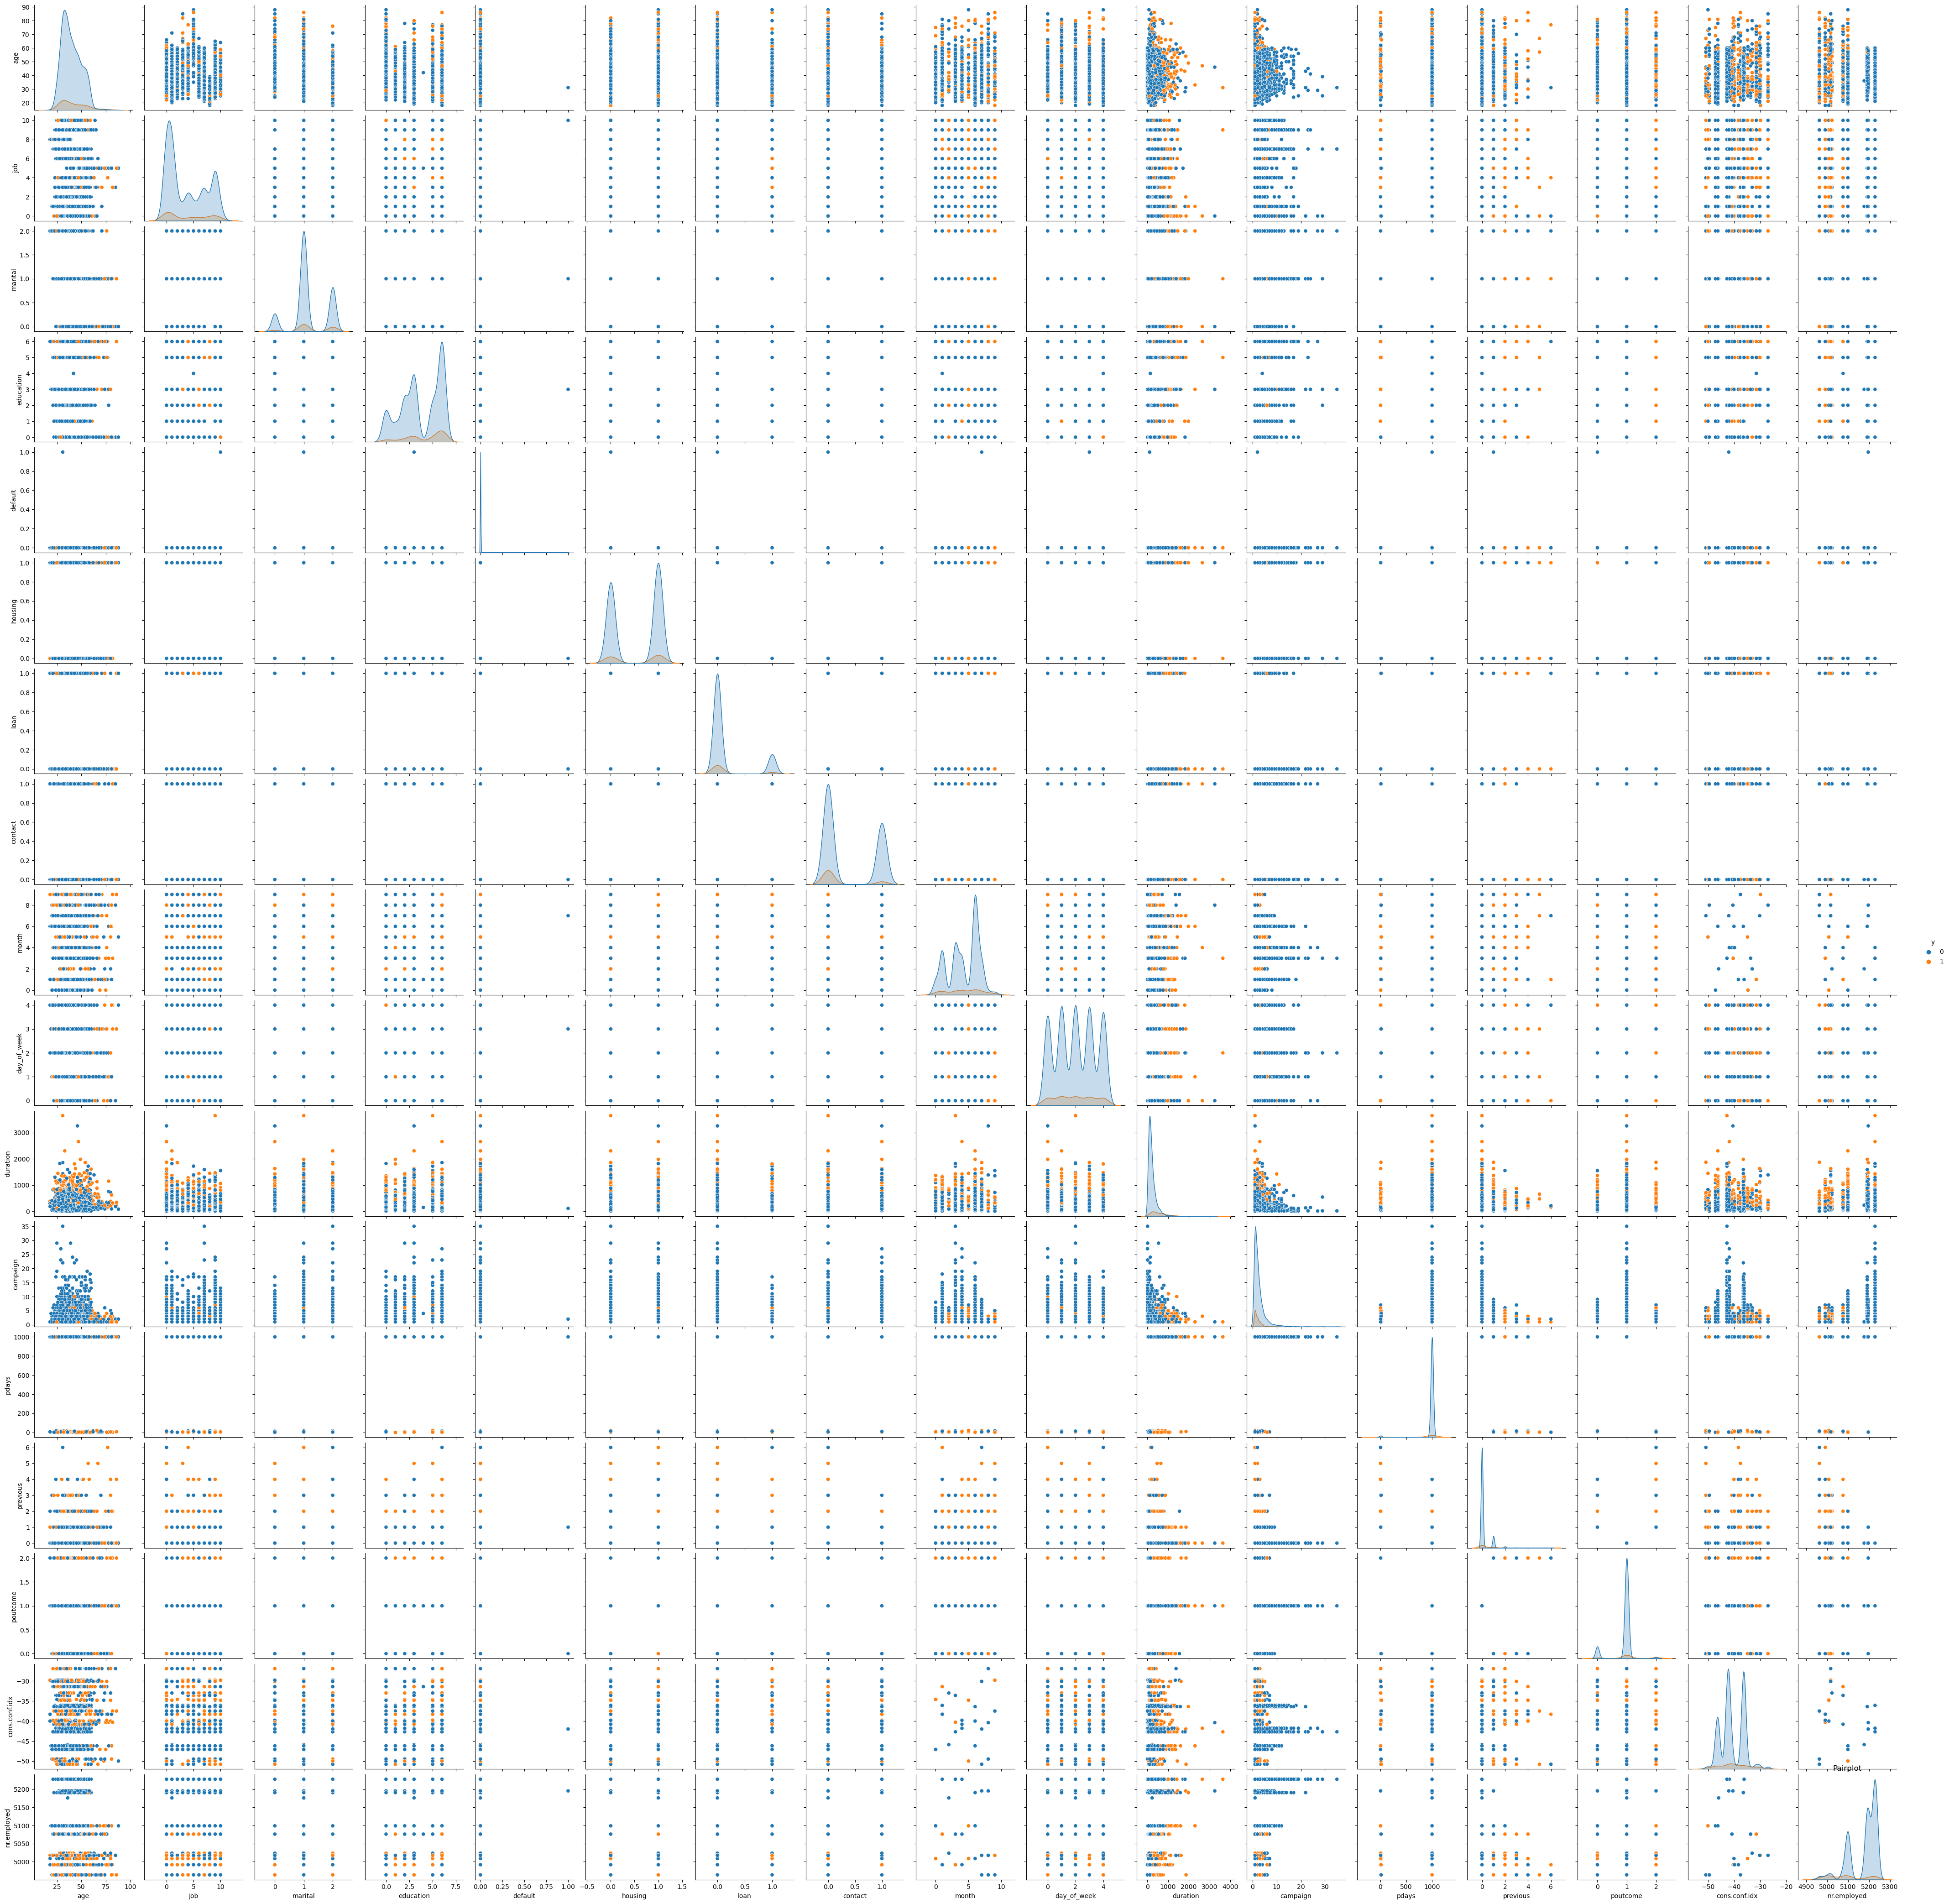

In [263]:
sns.pairplot(data=data, hue='y', diag_kind='kde')
plt.title('Pairplot')
plt.show()

# Correlation Heatmap

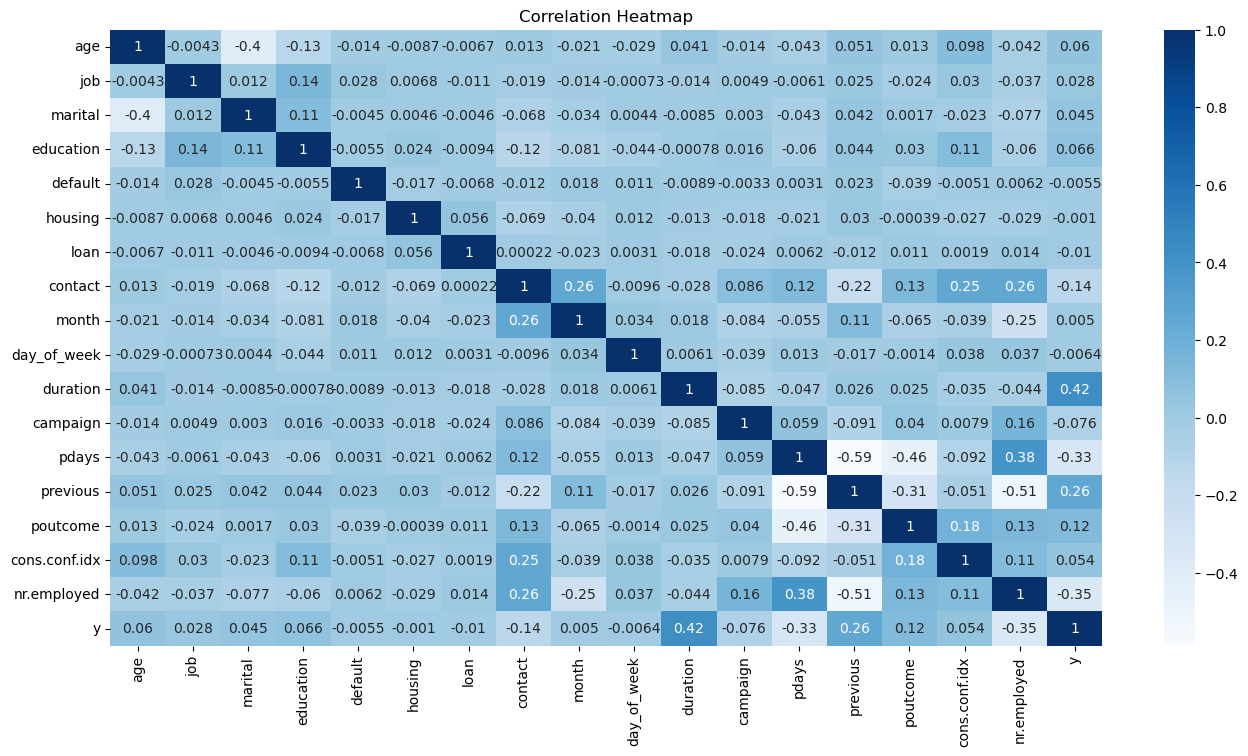

In [264]:
plt.figure(figsize=(16, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

This heatmap displays the correlation matrix among numerical variables in the preprocessed data. 
Each cell's color represents the correlation coefficient between two variables. 
This helps you identify which variables have stronger positive or negative correlations. 
The diagonal elements show the correlation of a variable with itself (which is always 1).
The data is not correlated

# Data Splitting

In [265]:
# Adding values of all the columns except column 'y' in X
x = data.values[:,0:-1]
# Adding value of only 'y' column in Y because we have to predict the numberr of people churned
y = data.values[:,-1]

In [266]:
x.shape

(4119, 17)

In [267]:
y.shape

(4119,)

Using StandardScaler to generalize the data

In [268]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

# Model Selection and Training

# Logistic Regression

Logistic Regression is a straightforward binary classification algorithm that models the probability of a binary outcome 
(in this case, whether a customer will subscribe or not) based on input features.Starting with the basic algorithms and moving forward

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7, stratify=y)

In [270]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2883, 17)
(2883,)
(1236, 17)
(1236,)


In [271]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data into the model
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [272]:
comparison=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
comparison[0:10].transpose()

,0,1,2,3,4,5,6,7,8,9
Actual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Predicted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Evaluation

In [273]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred))
 
acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[1082   19]
 [  77   58]]
classification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1101
         1.0       0.75      0.43      0.55       135

    accuracy                           0.92      1236
   macro avg       0.84      0.71      0.75      1236
weighted avg       0.91      0.92      0.91      1236

accuracy of the model:  0.9223300970873787


In [274]:
y_pred=classifier.predict_proba(X_test)
print(y_pred)

y_pred_class=[]
for value in y_pred[:,1]:
    if value > 0.4:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[[0.99110605 0.00889395]
 [0.94372083 0.05627917]
 [0.9726881  0.0273119 ]
 ...
 [0.98707982 0.01292018]
 [0.98823906 0.01176094]
 [0.98515279 0.01484721]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [275]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 92  , type 2 error : 64  , type 1 error: 28
Errors at threshold  0.41000000000000003 : 92  , type 2 error : 66  , type 1 error: 26
Errors at threshold  0.42000000000000004 : 94  , type 2 error : 69  , type 1 error: 25
Errors at threshold  0.43000000000000005 : 94  , type 2 error : 70  , type 1 error: 24
Errors at threshold  0.44000000000000006 : 94  , type 2 error : 70  , type 1 error: 24
Errors at threshold  0.45000000000000007 : 93  , type 2 error : 70  , type 1 error: 23
Errors at threshold  0.4600000000000001 : 94  , type 2 error : 72  , type 1 error: 22
Errors at threshold  0.4700000000000001 : 97  , type 2 error : 75  , type 1 error: 22
Errors at threshold  0.4800000000000001 : 96  , type 2 error : 75  , type 1 error: 21
Errors at threshold  0.4900000000000001 : 96  , type 2 error : 76  , type 1 error: 20
Errors at threshold  0.5000000000000001 : 96  , type 2 error : 77  , type 1 error: 19
Errors at threshold  0.5100000000000001 : 97  , type 2 error : 7

In [276]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred_class))

acc=accuracy_score(y_test,y_pred_class)
print('accuracy of the model: ',acc)

[[1073   28]
 [  64   71]]
classification report: 
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      1101
         1.0       0.72      0.53      0.61       135

    accuracy                           0.93      1236
   macro avg       0.83      0.75      0.78      1236
weighted avg       0.92      0.93      0.92      1236

accuracy of the model:  0.9255663430420712


Classification Report:
- True Negative (TN): 1073
- False Positive (FP): 28
- False Negative (FN): 64
- True Positive (TP): 71

Precision (for Class 1, positive class): 0.72
  - This means that out of all the instances predicted as positive, 72% of them are truly positive. It indicates the model's ability to make accurate positive predictions.

Recall (for Class 1, positive class): 0.53
  - This means that the model correctly identifies 53% of all the actual positive instances. It's a measure of the model's ability to capture positive cases.

F1-Score (for Class 1, positive class):0.61
  - The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, the F1-score for Class 1 is 0.61, indicating a reasonable balance between precision and recall.

Accuracy: 0.93
  - The overall accuracy of the model is 93%, which is the percentage of correctly classified instances out of all instances. It suggests that the model performs well in terms of overall accuracy.

Interpretation:

- The F1-score of 0.61 is a balance between precision and recall. It indicates that the model provides a reasonable trade-off between making accurate positive predictions and capturing actual positive instances.

- The overall accuracy of 93% suggests that the model performs well in terms of overall correctness

In summary, this classification report suggests that the model is reasonably good at making positive predictions while maintaining a decent balance between precision and recall.

# Random Forest Classifier

Random Forest is an ensemble algorithm that builds multiple decision trees and combines their predictions.
It's less prone to overfitting due to the averaging effect of multiple trees.
It provides feature importance scores that help identify key predictors of churn

Splitting data into training and testing sets

In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7, stratify=y)

In [278]:
#predicting using random forest classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=200,max_depth=None, min_samples_split=2 , random_state=7)

##fit the model in the data and predict the values

model_RandomForest.fit(X_train,y_train)

y_pred=model_RandomForest.predict(X_test)

# Model Evaluation

In [279]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[1072   29]
 [  70   65]]
classification report: 
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      1101
         1.0       0.69      0.48      0.57       135

    accuracy                           0.92      1236
   macro avg       0.82      0.73      0.76      1236
weighted avg       0.91      0.92      0.91      1236

accuracy of the model:  0.9199029126213593


Classification Report:
- True Negative (TN): 1072
- False Positive (FP): 29
- False Negative (FN): 70
- True Positive (TP): 65

Precision (for Class 1, positive class): 0.69
  - This means that out of all the instances predicted as positive, 69% of them are truly positive. The precision score reflects the model's ability to correctly identify positive instances.

Recall (for Class 1, positive class): 0.48
  - The model correctly captures 48% of all the actual positive instances. Recall represents the model's sensitivity to detecting positive cases.

F1-Score (for Class 1, positive class): 0.57
  - The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, the F1-score for Class 1 is 0.57, indicating a trade-off between precision and recall.

Accuracy: 0.92
  - The overall accuracy of the model is 92%, which is the percentage of correctly classified instances out of all instances.

Interpretation:

- The F1-score of 0.57 indicates a balance between precision and recall. It suggests that the model is providing a trade-off between making accurate positive predictions and capturing actual positive instances.

- The overall accuracy of 92% indicates that the model performs well in terms of overall correctness.

In summary, this classification report indicates that the model has reasonable precision and a relatively lower recall for positive class predictions. The F1-score suggests a trade-off between precision and recall. 

# Support Vector Machine

SVM is a powerful algorithm that tries to find a hyperplane that best separates the classes.
SVM with different kernels can capture non-linear patterns

Splitting data into training and testing sets

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7, stratify=y)

In [281]:
from sklearn.svm import SVC
#create a model
svc_model=SVC(kernel='linear',C=0.01,gamma='scale')
#fitting training data into the model
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
print(y_pred)
print(list(zip(y_test,y_pred)))

[0. 0. 0. ... 0. 0. 0.]
[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.

# Model Evaluation

In [282]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[1077   24]
 [  98   37]]
classification report: 
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1101
         1.0       0.61      0.27      0.38       135

    accuracy                           0.90      1236
   macro avg       0.76      0.63      0.66      1236
weighted avg       0.88      0.90      0.88      1236

accuracy of the model:  0.901294498381877


In [283]:
svc_model.score(X_train,y_train)

0.8997571973638571

Classification Report:
- True Negative (TN): 1077
- False Positive (FP): 24
- False Negative (FN): 98
- True Positive (TP): 37

Precision (for Class 1, positive class): 0.61
  - This means that out of all the instances predicted as positive, 61% of them are truly positive. The precision score reflects the model's ability to correctly identify positive instances.

Recall (for Class 1, positive class): 0.27
  - The model correctly captures only 27% of all the actual positive instances. Recall represents the model's sensitivity to detecting positive cases.

F1-Score (for Class 1, positive class): 0.38
  - The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, the F1-score for Class 1 is 0.38, indicating a trade-off between precision and recall.

Accuracy: 0.90
  - The overall accuracy of the model is 90%, which is the percentage of correctly classified instances out of all instances.

Interpretation:

- The F1-score of 0.38 is a trade-off between precision and recall, suggesting that the model doesn't perform strongly in either precision or recall.

- The overall accuracy of 90% indicates the overall correctness of the model's predictions.

In summary, this classification report indicates that the model has relatively low recall for positive class predictions, indicating a challenge in capturing all positive instances.

# Gradient Boosting Classifier

Gradient Boosting builds an ensemble of decision trees sequentially, where each tree tries to correct the mistakes of the previous ones.
It's powerful and often yields strong predictive performance

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.27, random_state=7, stratify=y)

In [285]:
#predicting using ada_boostclassifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=500)

##fit the model in the data and predict the values

model_GradientBoosting.fit(X_train,y_train)

y_pred=model_GradientBoosting.predict(X_test)

# Model Evaluation

In [286]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[952  39]
 [ 55  67]]
classification report: 
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       991
         1.0       0.63      0.55      0.59       122

    accuracy                           0.92      1113
   macro avg       0.79      0.75      0.77      1113
weighted avg       0.91      0.92      0.91      1113

accuracy of the model:  0.9155435759209344


Classification Report:
- True Negative (TN): 951
- False Positive (FP): 40
- False Negative (FN): 55
- True Positive (TP): 67

Precision (for Class 1, positive class): 0.63
  - This means that out of all the instances predicted as positive, 63% of them are truly positive. The precision score reflects the model's ability to correctly identify positive instances.

Recall (for Class 1, positive class): 0.55
  - The model correctly captures 55% of all the actual positive instances. Recall represents the model's sensitivity to detecting positive cases.

F1-Score (for Class 1, positive class): 0.59
  - The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, the F1-score for Class 1 is 0.59, indicating a trade-off between precision and recall.

Accuracy: 0.91
  - The overall accuracy of the model is 91%, which is the percentage of correctly classified instances out of all instances.

Interpretation:

- The F1-score of 0.59 suggests a trade-off between precision and recall, indicating a moderate balance between making accurate positive predictions and capturing actual positive instances.

- The overall accuracy of 91% indicates that the model performs well in terms of overall correctness.

In summary, this classification report indicates that the model has reasonable precision and recall for positive class predictions. The F1-score suggests a trade-off between precision and recall. 

# Conclusion

Here we will go with Logistic Regression
- Precision (Class 1): 0.72
- Recall (Class 1): 0.53
- F1-Score (Class 1): 0.61
- Accuracy: 0.93

1) Higher Precision for Class 1 (Positive Class):
   - Precision measures the proportion of positive predictions that are actually correct. In this case, the precision for Class 1 is 0.72, which means that when the model predicts a positive outcome, it is correct about 72% of the time. This indicates that the model has a relatively low rate of false positives, which is important for tasks where false positives are costly.

2) Reasonable Recall for Class 1 (Positive Class):
   - Recall (also known as sensitivity) measures the ability of the model to correctly capture positive instances. A recall of 0.53 indicates that the model captures 53% of all actual positive instances. While not extremely high, this recall value is still reasonable and indicates that the model is sensitive enough to detect positive cases.

3) Higher F1-Score for Class 1 (Positive Class):
   - The F1-score is the harmonic mean of precision and recall. It provides a balance between these two metrics. With an F1-score of 0.61, the Logistic model strikes a better balance between precision and recall for the positive class compared to the other model's F1-score's.

4) Higher Overall Accuracy:
   - The overall accuracy of the new report's model is 93%, which is higher than the other model. This indicates that the Logistic model makes correct predictions for a larger proportion of instances.

5) Balanced Trade-off:
   - While precision and recall are not extremely high, they are in a reasonable balance. A precision of 0.72 suggests that the model avoids making too many false positive predictions, and a recall of 0.53 indicates that it captures a significant portion of actual positive instances. The F1-score of 0.61 further reinforces this balance.

6) Better Performance Metrics Overall:
   - The Logistic model outperforms the other models in terms of precision, recall, F1-score, and accuracy, making it a stronger choice for predictive tasks where both precision and recall are important.

In summary, the Logistic model offers a better balance between precision and recall for the positive class, along with higher overall accuracy. While no model is perfect, the metrics from the Logistic Model indicate that it performs better across different aspects of predictive performance, making it a more suitable choice for the given classification task.